# 1.) Import the data from CCLE into a new Google Colab file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/insurance.csv")

In [4]:
df.loc[df["sex"] == "female","sex"] = 1.
df.loc[df["sex"] == "male","sex"] = 0.

In [5]:
# Convert smoke and region
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [6]:
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,1,3,16884.92400
1,18,0.0,33.770,1,0,2,1725.55230
2,28,0.0,33.000,3,0,2,4449.46200
3,33,0.0,22.705,0,0,1,21984.47061
4,32,0.0,28.880,0,0,1,3866.85520


In [8]:
# split independent variable and response variable
data = df.iloc[:,0:6]
target = df.iloc[:,6]

# 2.) Split the data into 80/20, in/out sample

In [9]:
cut = int(len(data) * .8) // 1

In [10]:
in_data = data[:cut]
out_data = data[cut:]
in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [11]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

In [12]:
in_data_scale

array([[-1.45390122,  1.02077653, -0.47403991, -0.90286618,  1.99417757,
         1.34066165],
       [-1.52464584, -0.97964634,  0.4911621 , -0.06353793, -0.50145986,
         0.4373191 ],
       [-0.81719959, -0.97964634,  0.36455128,  1.61511857, -0.50145986,
         0.4373191 ],
       ...,
       [-0.03900872, -0.97964634,  1.95211949, -0.90286618, -0.50145986,
        -1.36936599],
       [ 1.65886228, -0.97964634, -1.50008089, -0.06353793, -0.50145986,
        -0.46602344],
       [ 1.02216066,  1.02077653,  0.18367867, -0.06353793, -0.50145986,
         0.4373191 ]])

# 4.) Get lambda from Lasso cross validation

In [13]:
from sklearn.linear_model import LassoCV

In [14]:
modCV = LassoCV().fit(in_data_scale, in_target)

In [15]:
a = modCV.alpha_ # Optimized Lambda

In [16]:
a

133.34880015958146

# 5.) Run a lambda regression with that Lambda

In [17]:
from sklearn.linear_model import Lasso

In [18]:
model = Lasso(alpha=a).fit(in_data_scale,in_target)

In [19]:
model.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

# 6.) Visualize the coefficients 

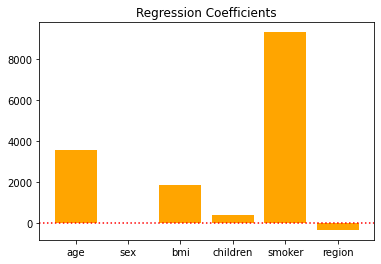

In [20]:
plt.bar(data.columns,model.coef_, color = 'orange')
plt.axhline(y=0,ls=":",c="red")
plt.title("Regression Coefficients")
plt.show()

# 7.) Interpret the coefficients

The coefficients of the variables "age", "bmi", "children" is positive, indicating that an increase in these variables will have a positive influence on charges. The coefficient of "smoker" is positive, indicating that compared to a non-smoker, a smoker is predicted to have higher charges. The coefficient of the varibale "region" is negative, suggesting that a region with higher number (southwest = 3,southeast = 2, northwest = 1, northest = 0) is predicted to have lower charges. The coefficient of variable "sex" is 0, suggesting that "sex" has no influence on charges.

# 8.) Compare in and out of sample MSE’s

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
in_data_predict = model.predict(in_data_scale)
print(mean_squared_error(in_target, in_data_predict))
out_data_predict = model.predict(out_data_scale)
print(mean_squared_error(out_target, out_data_predict))

36490415.101693384
37252730.724018715


It can be seen that the in sample MSE is slightly smaller than the out sample MSE.